# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Сделаем 20 разных train_test_split и обучите на них KNN-классификатор. Оценим качество на тестовой выборке

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
for i in range(20):
    rand_state = np.random.randint(100) # Генерация случайного числа для random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand_state) # Разбиение датасета на обучаемую и тестовую выборку
    # Обучение модели Knn
    model = KNeighborsClassifier() 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) # Оценка качества модели
    print('№{} Accuracy: {}'.format(i, round(accuracy, 5)))

№0 Accuracy: 0.94737
№1 Accuracy: 0.92105
№2 Accuracy: 0.97368
№3 Accuracy: 0.94737
№4 Accuracy: 0.89474
№5 Accuracy: 0.94737
№6 Accuracy: 1.0
№7 Accuracy: 0.92105
№8 Accuracy: 0.94737
№9 Accuracy: 1.0
№10 Accuracy: 0.97368
№11 Accuracy: 0.94737
№12 Accuracy: 0.94737
№13 Accuracy: 0.97368
№14 Accuracy: 0.97368
№15 Accuracy: 0.94737
№16 Accuracy: 0.94737
№17 Accuracy: 0.97368
№18 Accuracy: 0.97368
№19 Accuracy: 0.94737


**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

In [6]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, X, y, cv=10)
print(results)
print('Average result: {}'.format(round(np.mean(results), 3)))

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
Average result: 0.967


# Подбор оптимального количестов соседей через CrossValidationScore

## Подберем оптимальное количество соседей на основе cross_val_score

In [7]:
best_param = (3, 0.0)

for n_neigh in range(3, 30):
    model = KNeighborsClassifier(n_neighbors=n_neigh)
    results = cross_val_score(model, X, y, cv=10)
    avg_average = np.mean(results)
    print('Neighbors count: {}\tAverage result: {}'.format(n_neigh, round(avg_average, 3)))
    
    if avg_average > best_param[1]:
        best_param = (n_neigh, avg_average)

print('\nBest n_neighbors is {}'.format(best_param[0]))

Neighbors count: 3	Average result: 0.967
Neighbors count: 4	Average result: 0.967
Neighbors count: 5	Average result: 0.967
Neighbors count: 6	Average result: 0.967
Neighbors count: 7	Average result: 0.967
Neighbors count: 8	Average result: 0.967
Neighbors count: 9	Average result: 0.973
Neighbors count: 10	Average result: 0.967
Neighbors count: 11	Average result: 0.967
Neighbors count: 12	Average result: 0.973
Neighbors count: 13	Average result: 0.98
Neighbors count: 14	Average result: 0.973
Neighbors count: 15	Average result: 0.973
Neighbors count: 16	Average result: 0.973
Neighbors count: 17	Average result: 0.973
Neighbors count: 18	Average result: 0.98
Neighbors count: 19	Average result: 0.973
Neighbors count: 20	Average result: 0.98
Neighbors count: 21	Average result: 0.967
Neighbors count: 22	Average result: 0.967
Neighbors count: 23	Average result: 0.973
Neighbors count: 24	Average result: 0.96
Neighbors count: 25	Average result: 0.967
Neighbors count: 26	Average result: 0.96
Neig

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [10]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [11]:
# instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [12]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0004346132278442383
std_fit_time : 8.258534973319543e-05
mean_score_time : 0.001221609115600586
std_score_time : 0.00020391643776895764
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.05333333333333332
rank_test_score : 24


In [14]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

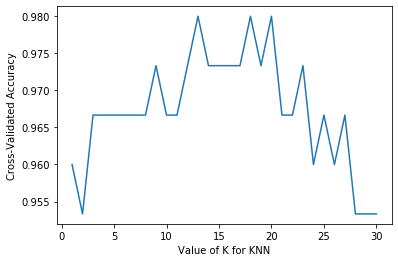

In [15]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Сonfusion_matrix для лучшего estimator'а

In [17]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y)

estimator = grid.best_estimator_
predictions = estimator.predict(X_test)

confusion_matrix(y_test, predictions)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

## Перебор нескольких параметров одновременно

In [156]:
weights_list = ['uniform', 'distance']

In [160]:
grid_params = {'n_neighbors': k_range, 'weights': weights_list}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=grid_params, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [161]:
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0008499383926391602
std_fit_time : 0.0002491554790542507
mean_score_time : 0.002822279930114746
std_score_time : 0.0009536282185499783
param_n_neighbors : 1
param_weights : uniform
params : {'n_neighbors': 1, 'weights': 'uniform'}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 52


In [165]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [166]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [180]:
rnd_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=grid_params, scoring='accuracy')
rnd_search.fit(X, y)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'd

In [177]:
rnd_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [181]:
rnd_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [182]:
rnd_search.best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [178]:
rnd_search.best_params_

{'weights': 'distance', 'n_neighbors': 10}

In [183]:
rnd_search.best_score_

0.98

In [179]:
rnd_search.best_score_

0.9866666666666667

## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [52]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9464285714285714
0.9736842105263158


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [186]:
from sklearn.datasets import load_digits

In [55]:
data = load_digits()

In [56]:
X, y = data['data'], data['target']

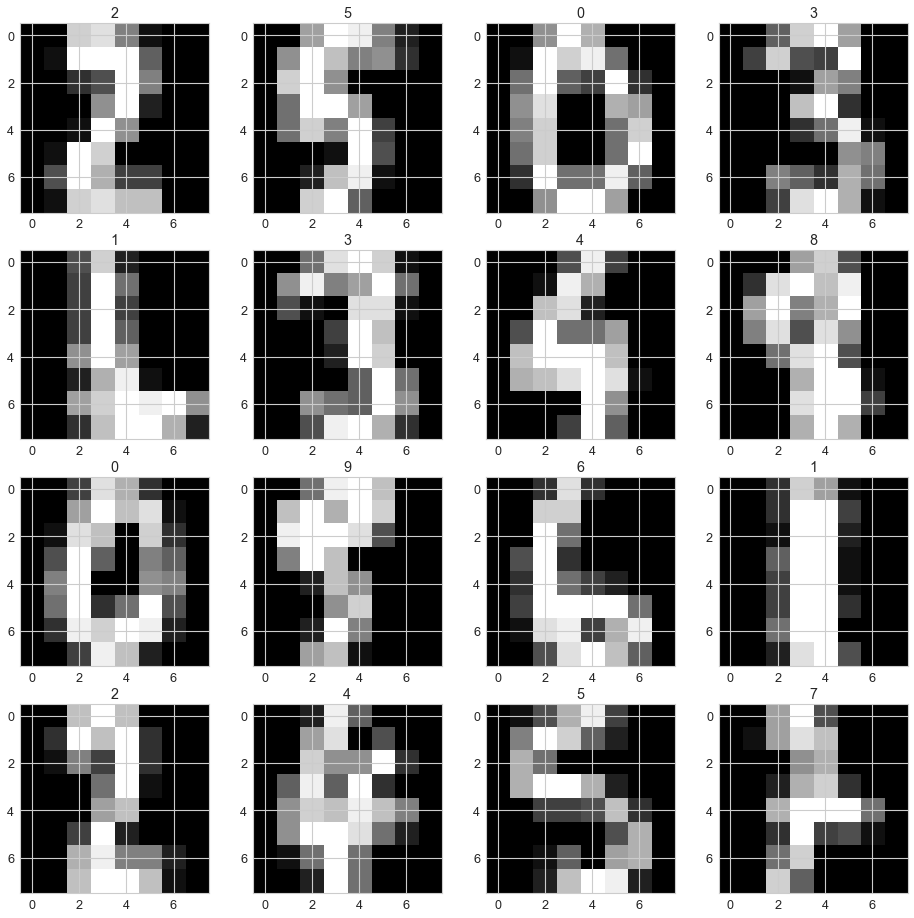

In [57]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
        
plt.show()


In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)